# **Import & Install Library**

In [ ]:
#Import library preprocessing
from google.colab import files
import random as rd
import zipfile, os # library untuk mendownload zipfile
from tqdm import tqdm # sebagai pemanis visual saat mengimport gambar ke dalam array list
import numpy as np  # library untuk mengubah gambar menjadi array
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop # mengimport optimizer untuk model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import image
from keras.utils import to_categorical # Untuk melabeli gambar
import cv2 # Mengimport gambar

#Import library visualisasi
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix # untuk evaluasi model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Install library split_folders
!pip install split_folders
import splitfolders

In [ ]:
# Mendownload dataset cupang menggunakan wget

!wget --no-check-certificate \
  https://dl.dropbox.com/s/rj36dlez35pnjdb/dataset-cupang.zip?dl=2 \
  -O /tmp/dataset-cupang.zip

--2020-09-01 04:24:22--  https://dl.dropbox.com/s/rj36dlez35pnjdb/dataset-cupang.zip?dl=2
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/rj36dlez35pnjdb/dataset-cupang.zip?dl=2 [following]
--2020-09-01 04:24:22--  https://dl.dropboxusercontent.com/s/rj36dlez35pnjdb/dataset-cupang.zip?dl=2
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.1.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15534109 (15M) [application/zip]
Saving to: ‘/tmp/dataset-cupang.zip’

/tmp/dataset-cupang 100%[===================>]  14.81M  90.8MB/s    in 0.2s    

2020-09-01 04:24:22 (90.8 MB/s) - ‘/tmp/dataset-cupang.zip’ saved [15534109/155341

In [ ]:
# Mengekstrak folder zip yang telah terdownload
local_zip = '/tmp/dataset-cupang.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/dataset-cupang'

Folder yang telah terekstrak akan terlihat seperti ini:
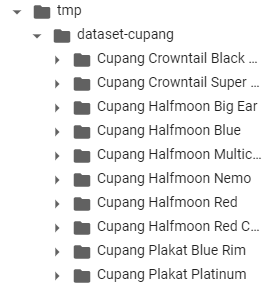

# **Data Preprocessing**

In [ ]:
# Memakai library split_folders untuk membagi data train dan validasi
import splitfolders

# Membagi data train dan validasi dengan perbandingan 80% : 20%
splitfolders.ratio('/tmp/dataset-cupang', output="dataset", seed=43, ratio=(.8, .2)) 

Copying files: 2189 files [00:00, 4991.13 files/s]


In [ ]:
path = "/content/dataset/"
train_dir = path + "train" 
validation_dir = path + "val"

In [ ]:
print(train_dir)
print(validation_dir)

/content/dataset/train
/content/dataset/val


Splitting akan terlihat seperti gambar di berikut ini:
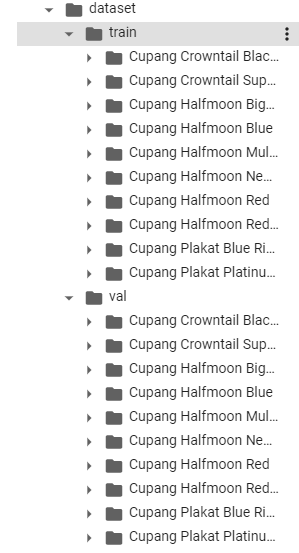

## Memasukkan Data Validasi ke dalam Array List

In [ ]:
print(os.listdir('/tmp/dataset-cupang'))

['Cupang Halfmoon Blue', 'Cupang Halfmoon Red', 'Cupang Plakat Blue Rim', 'Cupang Crowntail Black Orchid', 'Cupang Halfmoon Nemo', 'Cupang Crowntail Super Red', 'Cupang Halfmoon Big Ear', 'Cupang Halfmoon Multicolor', 'Cupang Halfmoon Red Cooper', 'Cupang Plakat Platinum']


In [ ]:
X = []
Z = []
Crowntail_Black_Orchid_dir = "/content/dataset/val/Cupang Crowntail Black Orchid"
Crowntail_Super_Red_dir = "/content/dataset/val/Cupang Crowntail Super Red"
Halfmoon_Big_Ear_dir = "/content/dataset/val/Cupang Halfmoon Big Ear"
Halfmoon_Blue_dir = "/content/dataset/val/Cupang Halfmoon Blue"
Halfmoon_Multicolor_dir = "/content/dataset/val/Cupang Halfmoon Multicolor"
Halfmoon_Nemo_dir = "/content/dataset/val/Cupang Halfmoon Nemo"
Halfmoon_Red_dir = "/content/dataset/val/Cupang Halfmoon Red"
Halfmoon_Red_Cooper_dir = "/content/dataset/val/Cupang Halfmoon Red Cooper"
Plakat_Blue_Rim_dir = "/content/dataset/val/Cupang Plakat Blue Rim"
Plakat_Platinum_dir = "/content/dataset/val/Cupang Plakat Platinum"



Mendefinisikan Fungsi untuk memasukkan image ke dalam list array

In [ ]:
def assign_label(img, gbk): #gbk gambar ikan
    return gbk

def val_data(gbk,DIR): 
    for img in tqdm(os.listdir(DIR)):
        label= assign_label(img, gbk)
        path= os.path.join(DIR,img)
        img= cv2.imread(path,cv2.IMREAD_COLOR)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Warna menjadi RGB
        img= cv2.resize(img, (150,150)) # ukuran gambar menjadi 150 x 150 pixel
        
        X.append(np.array(img))
        Z.append(str(label))
        

Menggabungkan data paper, rock, scissor ke dalam 1 list

In [ ]:
val_data('Crowntail_Black_Orchid', Crowntail_Black_Orchid_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 406.53it/s]

44


In [ ]:
val_data('Crowntail_Super_Red', Crowntail_Super_Red_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 664.64it/s]

88


In [ ]:
val_data('Halfmoon_Big_Ear', Halfmoon_Big_Ear_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 776.05it/s]

132


In [ ]:
val_data('Halfmoon_Blue', Halfmoon_Blue_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 674.98it/s]

176


In [ ]:
val_data('Halfmoon_Multicolor', Halfmoon_Multicolor_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 774.16it/s]

220


In [ ]:
val_data('Halfmoon_Nemo', Halfmoon_Nemo_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 718.90it/s]

264


In [ ]:
val_data('Halfmoon_Red', Halfmoon_Red_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 723.20it/s]

308


In [ ]:
val_data('Halfmoon_Red_Cooper', Halfmoon_Red_Cooper_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 789.29it/s]

352


In [ ]:
val_data('Plakat_Blue_Rim', Plakat_Blue_Rim_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 782.40it/s]

396


In [ ]:
val_data('Plakat_Platinum', Plakat_Platinum_dir)
print(len(X))

100%|██████████| 44/44 [00:00<00:00, 881.70it/s]

440


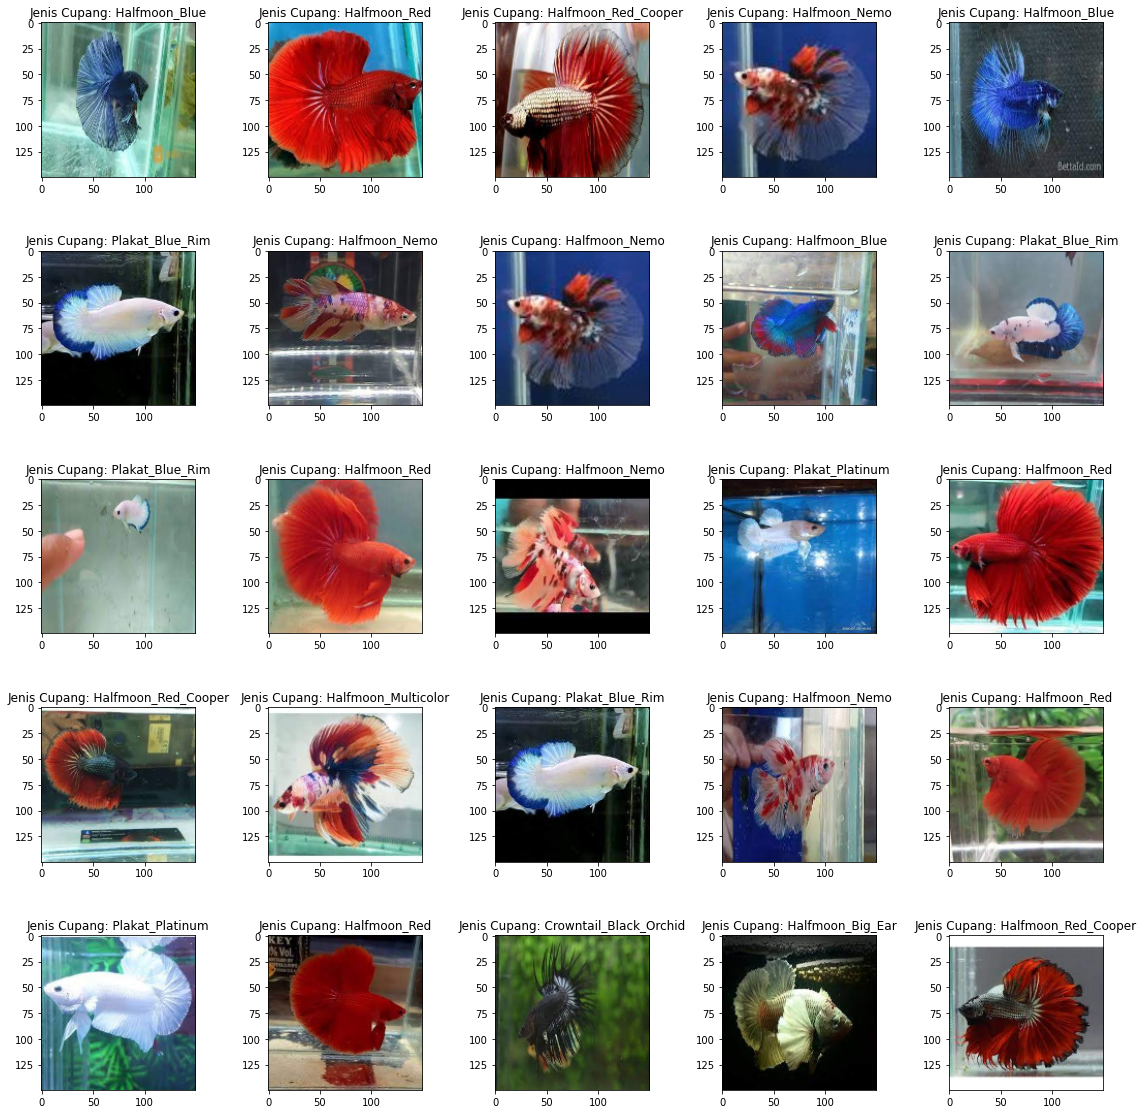

In [ ]:
# Menampilkan gambar validasi dengan acak
fig,ax=plt.subplots(5,5)
fig.set_size_inches(16,16)
for i in range(5):
    for j in range (5):
        gamb=rd.randint(0,len(Z))
        ax[i,j].imshow(X[gamb])
        ax[i,j].set_title('Jenis Cupang: '+Z[gamb])
        
plt.tight_layout()

## Augmentasi

Melakukan Augmentasi gambar untuk menciptakan data/gambar baru dari data yang telah ada

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.1, # mengubah zoom image 
                    width_shift_range=0.1,  # mengubah image secara horizontal
                    height_shift_range=0.1, # mengubah image secara vertikal
                    #validation_split=0.15,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False)  
                    
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True
                    )
                   

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=12,
        class_mode='categorical') # karena ini merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=1, 
        class_mode='categorical') # karena ini merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'

Found 1749 images belonging to 10 classes.
Found 440 images belonging to 10 classes.


# **Modelling**

In [ ]:
# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), '/content/sample_data')

model_name = 'cupang_weight_model2.h5'

# Create Directory if it doesn't exist
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)
# Join the directory with the model file
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
                             save_weights_only = True, period=1)

In [ ]:
# Inisialisasi class untuk menghentikan proses training apabila akurasi validasi telah diatas 95%
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.95):
      print("\nAkurasi validasi telah mencapai >95%!")
      self.model.stop_training = True
myCallBack = myCallBack()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='Same', activation='relu',  input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (5,5), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.2), # agar model tidak overfitting

    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='Same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # mereduksi resolusi gambar
    tf.keras.layers.Dropout(0.3), # agar model tidak overfitting

    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'), # Hidden layer
    tf.keras.layers.Dropout(0.5), # agar model tidak overfitting
    tf.keras.layers.Dense(10, activation='softmax') # 3 label output lalu menggunakan softmax karena model adalah klasifikasi kategori
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.0001), #Menggunakan optimizer rmsprop
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       7

In [ ]:
hist=model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=300, # jumlah maksimal epoch yang akan di eksekusi
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      callbacks=[checkpoint, myCallBack],
      #validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)


Epoch 1/300
35/35 [==============================] - ETA: 0s - loss: 3.1676 - accuracy: 0.0857
Epoch 00001: val_loss improved from inf to 3.03899, saving model to /content/sample_data/cupang_weight_model2.h5
35/35 [==============================] - 7s 196ms/step - loss: 3.1676 - accuracy: 0.0857 - val_loss: 3.0390 - val_accuracy: 0.1091
Epoch 2/300
35/35 [==============================] - ETA: 0s - loss: 2.8951 - accuracy: 0.1343
Epoch 00002: val_loss improved from 3.03899 to 2.65728, saving model to /content/sample_data/cupang_weight_model2.h5
35/35 [==============================] - 7s 194ms/step - loss: 2.8951 - accuracy: 0.1343 - val_loss: 2.6573 - val_accuracy: 0.2091
Epoch 3/300
35/35 [==============================] - ETA: 0s - loss: 2.4414 - accuracy: 0.2614
Epoch 00003: val_loss improved from 2.65728 to 2.27888, saving model to /content/sample_data/cupang_weight_model2.h5
35/35 [==============================] - 7s 192ms/step - loss: 2.4414 - accuracy: 0.2614 - val_loss: 2.278

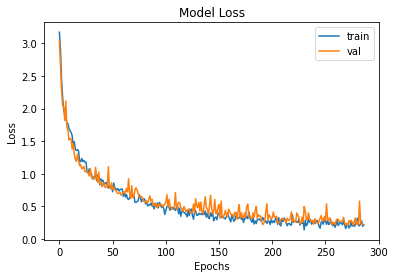

In [ ]:
# Menampilkan plot loss dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

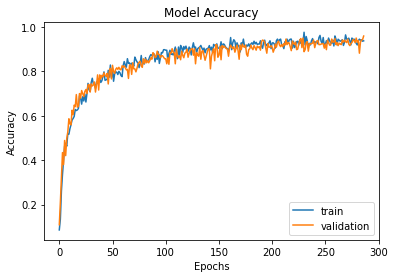

In [ ]:
# Menampilkan plot akurasi dari model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
dic = {'Crowntail_Black_Orchid': '0', 'Crowntail_Super_Red': '1', 'Halfmoon_Big_Ear': '2', 'Halfmoon_Blue': '3', 'Halfmoon_Multicolor': '4', 'Halfmoon_Nemo': '5',
       'Halfmoon_Red': '6', 'Halfmoon_Red_Cooper': '7', 'Plakat_Blue_Rim': '8', 'Plakat_Platinum': '9'}
Z2 = [dic.get(n, n) for n in Z]

Melabelkan array yang sudah ada di list array

In [ ]:
# Melabelkan list Y menjadi 10 kategori
le= LabelEncoder()
Y= le.fit_transform(Z2)
Y= to_categorical(Y,10)

# Merubah List X menjadi Array lalu menormalisasikannya
X_test= np.array(X)
X_test= X_test/255

Evaluasi Model dengan Confusion Matrix, Precision, Recall & F1-Score

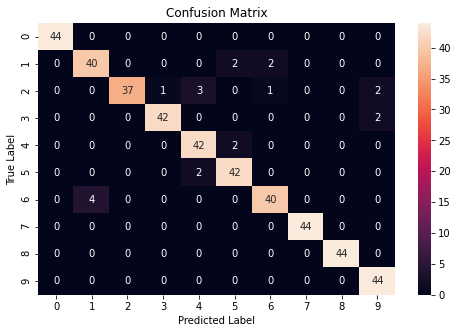

In [ ]:
#Mengevaluasi model dengan confussion matrix

pred= model.predict(X_test)
y_pred= np.argmax(pred, axis=1)
y_true= np.argmax(Y, axis=1)
cm = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluasi model dengan precision, recall & f1-score
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.91      0.91      0.91        44
           2       1.00      0.84      0.91        44
           3       0.98      0.95      0.97        44
           4       0.89      0.95      0.92        44
           5       0.91      0.95      0.93        44
           6       0.93      0.91      0.92        44
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        44
           9       0.92      1.00      0.96        44

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



# **Prediksi Model**

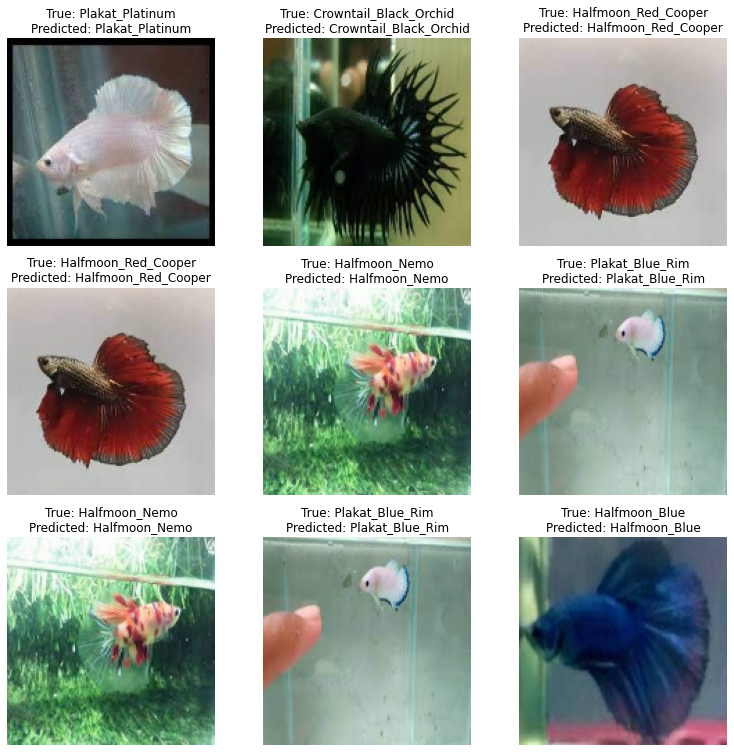

In [ ]:
dict_label = {0:'Crowntail_Black_Orchid', 1:'Crowntail_Super_Red', 2:'Halfmoon_Big_Ear', 
              3:'Halfmoon_Blue', 4:'Halfmoon_Multicolor', 5:'Halfmoon_Nemo',
              6:'Halfmoon_Red', 7:'Halfmoon_Red_Cooper', 8:'Plakat_Blue_Rim', 9:'Plakat_Platinum'}
def predict():
  random_data = np.random.randint(low = 0, high = len(X)-1, size=6)
  sample_images = X_test[random_data]
  sample_label = Y[random_data]
  predicted = model.predict(sample_images)
  predicted = np.argmax(predicted, axis=1) # Mengembalikan nilai terbesar dari array prediksi
  true_label = np.argmax(sample_label, axis=1) # Mengembalikan nilai terbesar dari array sample_label
  fig, axs = plt.subplots(3, 3)
  fig.set_size_inches(13,13)
  for row in range(3):
    for col in range(3):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row, col].imshow(sample_images[row+col+1])
      axs[row, col].set_title('True: %s\nPredicted: %s' % (dict_label[true], dict_label[pred]))
      axs[row, col].axis('off')

predict()

Saving IMG-6084.jpg to IMG-6084.jpg
[4]
Halfmoon_Multicolor


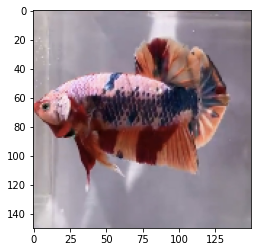

In [ ]:
# Mengupload dan memprediksi gambar baru yang telah diupload
# Apabila run pertama error maka harus dirun 2x
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    pred = model.predict(images, batch_size=10)
    classes = np.argmax(pred,axis=1)
  
    print(classes)
    if classes == 0:
      print('Crowntail_Black_Orchid')
    elif classes == 1:
      print('Crowntail_Super_Red')
    elif classes == 2:
      print('Halfmoon_Big_Ear')
    elif classes == 3:
      print('Halfmoon_Blue')
    elif classes == 4:
      print('Halfmoon_Multicolor')
    elif classes == 5:
      print('Halfmoon_Nemo')
    elif classes == 6:
      print('Halfmoon_Red')
    elif classes == 7:
      print('Halfmoon_Red_Cooper')
    elif classes == 8:
      print('Plakat_Blue_Rim')    
    else :
      print('Plakat_Platinum')
  

https://colab.research.google.com/drive/1YJ4yKONgol0fxQbyKp3xYrH_uUbyOJti?usp=sharing #Live view from colab

# Output Prediksi

## Output
